# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

     # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        data = city_weather.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data['coord']['lat']
        city_lng = data['coord']['lon']
        city_max_temp = data['main']['temp_max']
        city_humidity = data['main']['humidity']
        city_clouds = data['clouds']['all']
        city_wind = data['wind']['speed']
        city_country = data['sys']['country']
        city_date = data['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palmer
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | thoen
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | hammerfest
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | jiwani
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | christchurch
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | kavaratti
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | korla
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | saleaula
City not found. Skipping...
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | markala
Processing Record 18 of Set 1 | bembereke
Processing Record 19 of Set 1 | slave lake
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | lebu
Processing Record 22 o

Processing Record 33 of Set 4 | rocha
Processing Record 34 of Set 4 | tilichiki
Processing Record 35 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 4 | ginda
Processing Record 37 of Set 4 | weyburn
Processing Record 38 of Set 4 | te anau
Processing Record 39 of Set 4 | lata
Processing Record 40 of Set 4 | katubao
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | tolentino
Processing Record 43 of Set 4 | terrace
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | alamogordo
Processing Record 46 of Set 4 | halifax
Processing Record 47 of Set 4 | reconquista
Processing Record 48 of Set 4 | maraa
Processing Record 49 of Set 4 | new norfolk
Processing Record 0 of Set 5 | san joaquin
Processing Record 1 of Set 5 | brainerd
Processing Record 2 of Set 5 | asau
Processing Record 3 of Set 5 | saint george
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | marcona
City not found. Skipping...
Processing R

Processing Record 22 of Set 8 | hua hin
Processing Record 23 of Set 8 | aflu
City not found. Skipping...
Processing Record 24 of Set 8 | kuito
Processing Record 25 of Set 8 | praia da vitoria
Processing Record 26 of Set 8 | igunga
Processing Record 27 of Set 8 | mandera
Processing Record 28 of Set 8 | booue
Processing Record 29 of Set 8 | umm lajj
Processing Record 30 of Set 8 | soverato
Processing Record 31 of Set 8 | maniitsoq
Processing Record 32 of Set 8 | oranjemund
Processing Record 33 of Set 8 | damietta
Processing Record 34 of Set 8 | toppenish
Processing Record 35 of Set 8 | fuerte olimpo
Processing Record 36 of Set 8 | bani
Processing Record 37 of Set 8 | santiago
Processing Record 38 of Set 8 | urubicha
Processing Record 39 of Set 8 | moussoro
Processing Record 40 of Set 8 | nanuque
Processing Record 41 of Set 8 | yulara
Processing Record 42 of Set 8 | doha
Processing Record 43 of Set 8 | prince rupert
Processing Record 44 of Set 8 | honiara
Processing Record 45 of Set 8 | p

Processing Record 12 of Set 12 | oktyabrskiy
Processing Record 13 of Set 12 | varhaug
Processing Record 14 of Set 12 | monticello
Processing Record 15 of Set 12 | old road
City not found. Skipping...
Processing Record 16 of Set 12 | haines junction
Processing Record 17 of Set 12 | san clemente
Processing Record 18 of Set 12 | santa rosa del sur
Processing Record 19 of Set 12 | polican
Processing Record 20 of Set 12 | kabalo
Processing Record 21 of Set 12 | linxia
Processing Record 22 of Set 12 | talesh
City not found. Skipping...
Processing Record 23 of Set 12 | nalut
Processing Record 24 of Set 12 | banda aceh
Processing Record 25 of Set 12 | abu zabad
Processing Record 26 of Set 12 | kushiro
Processing Record 27 of Set 12 | bathsheba
Processing Record 28 of Set 12 | verkhnyaya inta
Processing Record 29 of Set 12 | yamada
Processing Record 30 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 31 of Set 12 | beihai
Processing Record 32 of Set 12 | mukhen
Processing Rec

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          535
Lat           535
Lng           535
Max Temp      535
Humidity      535
Cloudiness    535
Wind Speed    535
Country       535
Date          535
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palmer,42.1584,-72.3287,256.96,37,75,9.26,US,1675476504
1,ushuaia,-54.8000,-68.3000,282.96,62,0,10.29,AR,1675476779
2,thoen,17.6129,99.2161,301.38,59,37,0.79,TH,1675476643
3,norman wells,65.2820,-126.8329,247.43,98,96,0.29,CA,1675476780
4,hammerfest,70.6634,23.6821,270.40,68,75,3.09,NO,1675476780


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palmer,42.1584,-72.3287,256.96,37,75,9.26,US,1675476504
1,ushuaia,-54.8000,-68.3000,282.96,62,0,10.29,AR,1675476779
2,thoen,17.6129,99.2161,301.38,59,37,0.79,TH,1675476643
3,norman wells,65.2820,-126.8329,247.43,98,96,0.29,CA,1675476780
4,hammerfest,70.6634,23.6821,270.40,68,75,3.09,NO,1675476780


# Create the Scatter Plots Requested
#### Latitude Vs. Temperature

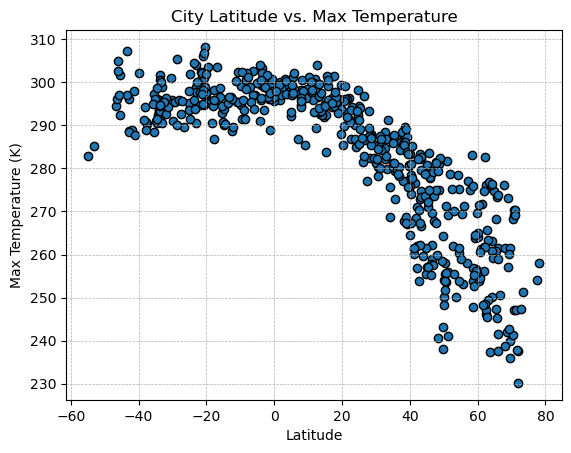

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")
plt.grid(linestyle='--', linewidth=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

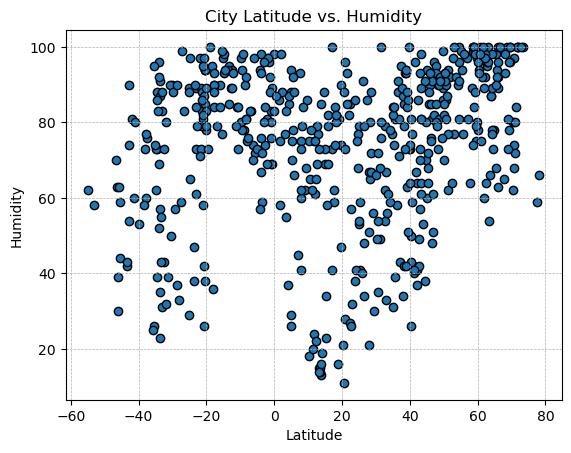

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")
plt.grid(linestyle='--', linewidth=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

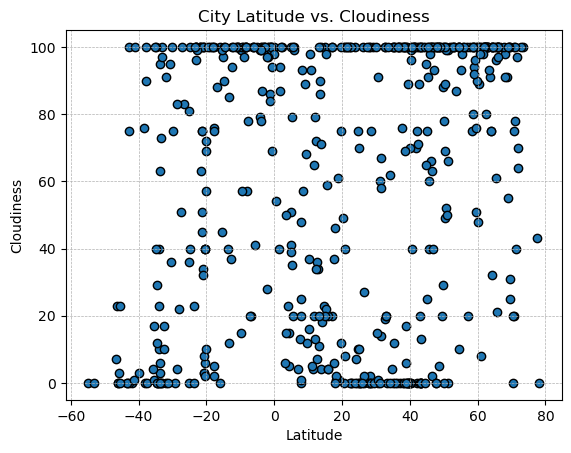

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")
plt.grid(linestyle='--', linewidth=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

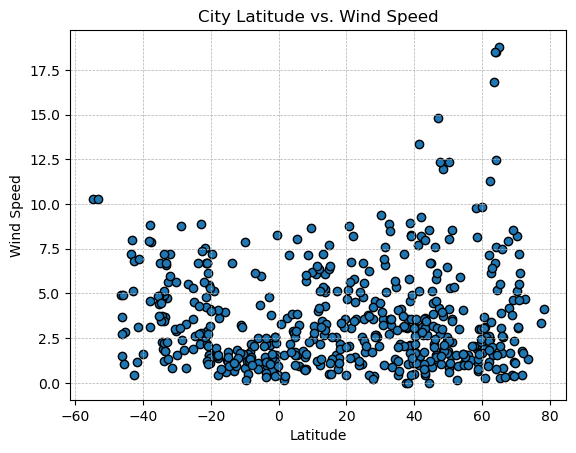

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")
plt.grid(linestyle='--', linewidth=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [23]:
# Define a function to create Linear Regression plots
import seaborn as sns

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palmer,42.1584,-72.3287,256.96,37,75,9.26,US,1675476504
2,thoen,17.6129,99.2161,301.38,59,37,0.79,TH,1675476643
3,norman wells,65.2820,-126.8329,247.43,98,96,0.29,CA,1675476780
4,hammerfest,70.6634,23.6821,270.40,68,75,3.09,NO,1675476780
6,jiwani,25.0500,61.7417,294.39,79,0,5.57,PK,1675476781


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,282.96,62,0,10.29,AR,1675476779
5,bredasdorp,-34.5322,20.0403,290.62,88,0,2.29,ZA,1675476780
8,christchurch,-43.5333,172.6333,307.30,42,0,7.20,NZ,1675476625
12,busselton,-33.6500,115.3333,301.58,35,3,3.68,AU,1675476783
17,mar del plata,-38.0023,-57.5575,294.19,73,0,3.13,AR,1675476713


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8483318096666073


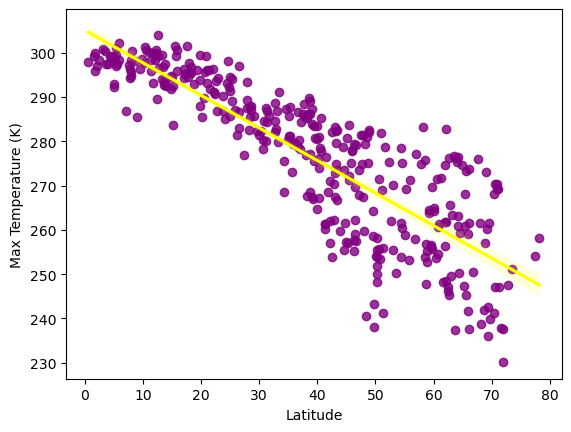

In [48]:
# Linear regression on Northern Hemisphere
from scipy import stats

def plot_linear_regression(x, y, dataframe, xlabel, ylabel):
    sns.regplot(x=x, y=y, data=dataframe, scatter_kws={"color": "purple"}, line_kws={"color": "yellow"})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
    print(f"The r-value is: {r_value}")
    
    plt.show()
    
plot_linear_regression('Lat', 'Max Temp', northern_hemi_df, 'Latitude', 'Max Temperature (K)')

The r-value is: 0.25979817714362274


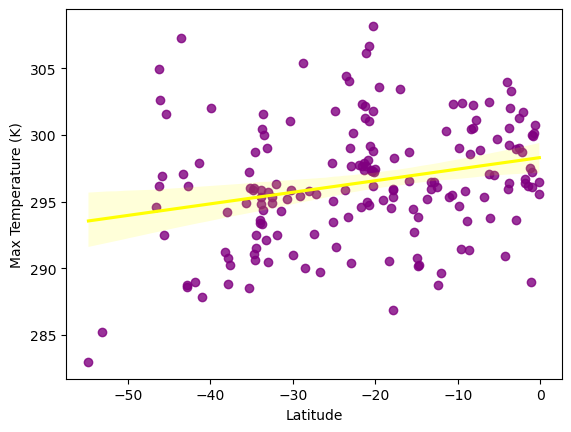

In [49]:
# Linear regression on Southern Hemisphere
from scipy import stats

def plot_linear_regression(x, y, dataframe, xlabel, ylabel):
    sns.regplot(x=x, y=y, data=dataframe, scatter_kws={"color": "purple"}, line_kws={"color": "yellow"})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
    print(f"The r-value is: {r_value}")
    
    plt.show()
    
plot_linear_regression('Lat', 'Max Temp', sourthern_hemi_df, 'Latitude', 'Max Temperature (K)')

**Discussion about the linear relationship:** The linear relationship for the Northern Hemisphere is much greater than the Southern Hemisphere when comparing Latitude coordinates to Max Temperatures.

### Humidity vs. Latitude Linear Regression Plot


The r-value is: 0.42975535979161017


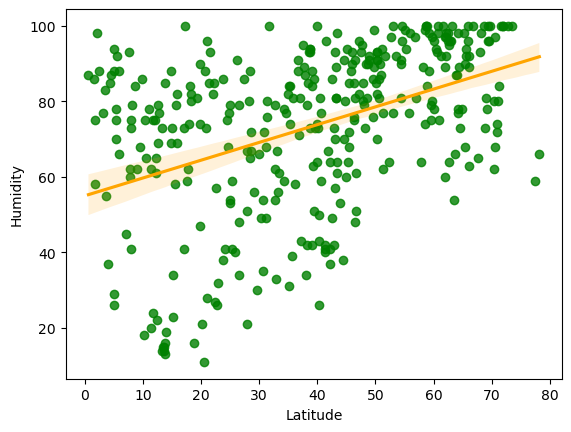

In [66]:
# Northern Hemisphere
from scipy import stats

def plot_linear_regression(x, y, dataframe, xlabel, ylabel):
    sns.regplot(x=x, y=y, data=dataframe, scatter_kws={"color": "green"}, line_kws={"color": "orange"})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
    print(f"The r-value is: {r_value}")
    
    plt.show()
    
plot_linear_regression('Lat', 'Humidity', northern_hemi_df, 'Latitude', 'Humidity')

The r-value is: 0.4351948228726416


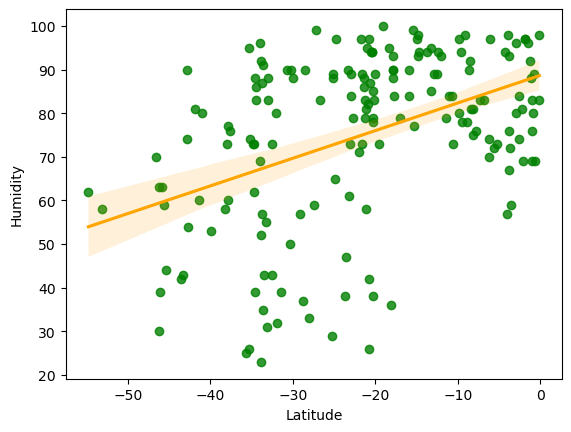

In [67]:
# Southern Hemisphere
from scipy import stats

def plot_linear_regression(x, y, dataframe, xlabel, ylabel):
    sns.regplot(x=x, y=y, data=dataframe, scatter_kws={"color": "green"}, line_kws={"color": "orange"})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
    print(f"The r-value is: {r_value}")
    
    plt.show()
    
plot_linear_regression('Lat', 'Humidity', southern_hemi_df, 'Latitude', 'Humidity')

**Discussion about the linear relationship:** The r-value is less than .50 and there is a mild correlation between Latitude & Humidity in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.34617877897541344


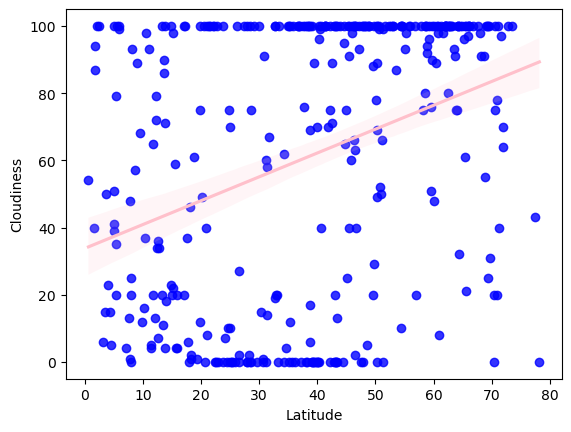

In [70]:
# Northern Hemisphere
from scipy import stats

def plot_linear_regression(x, y, dataframe, xlabel, ylabel):
    sns.regplot(x=x, y=y, data=dataframe, scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
    print(f"The r-value is: {r_value}")
    
    plt.show()
    
plot_linear_regression('Lat', 'Cloudiness', northern_hemi_df, 'Latitude', 'Cloudiness')

The r-value is: 0.5579626266133914


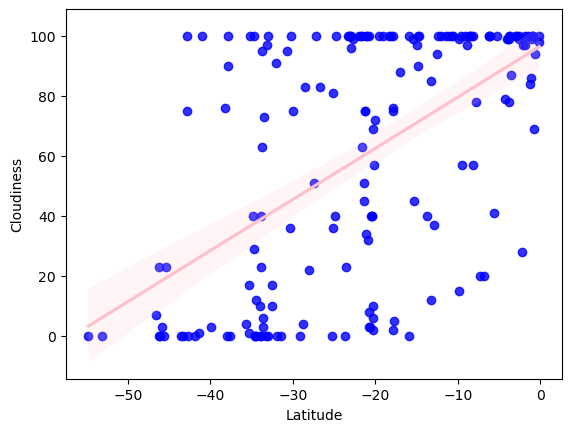

In [71]:
# Southern Hemisphere
from scipy import stats

def plot_linear_regression(x, y, dataframe, xlabel, ylabel):
    sns.regplot(x=x, y=y, data=dataframe, scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
    print(f"The r-value is: {r_value}")
    
    plt.show()
    
plot_linear_regression('Lat', 'Cloudiness', southern_hemi_df, 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** There is a very mild correlation between Latitude and Cloudiness in the Southern Hemisphere but no correlation in the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot


The r-value is: 0.09381650127187827


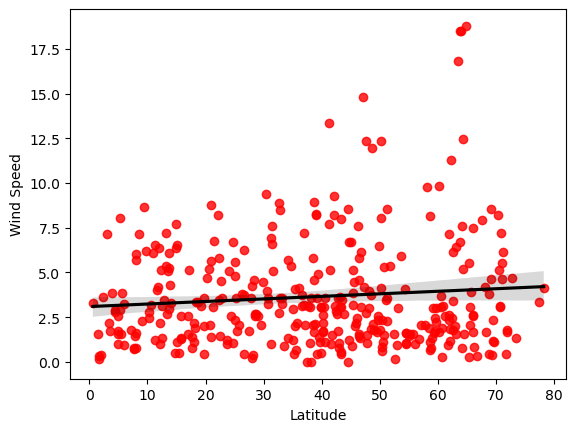

In [72]:
# Northern Hemisphere
from scipy import stats

def plot_linear_regression(x, y, dataframe, xlabel, ylabel):
    sns.regplot(x=x, y=y, data=dataframe, scatter_kws={"color": "red"}, line_kws={"color": "black"})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
    print(f"The r-value is: {r_value}")
    
    plt.show()
    
plot_linear_regression('Lat', 'Wind Speed', northern_hemi_df, 'Latitude', 'Wind Speed')

The r-value is: -0.4424513800806638


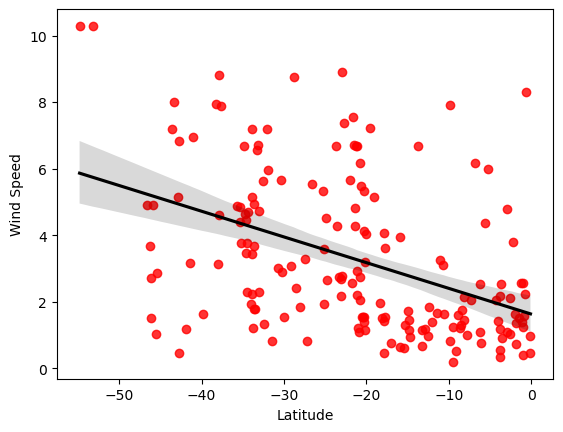

In [73]:
# Southern Hemisphere
from scipy import stats

def plot_linear_regression(x, y, dataframe, xlabel, ylabel):
    sns.regplot(x=x, y=y, data=dataframe, scatter_kws={"color": "red"}, line_kws={"color": "black"})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
    print(f"The r-value is: {r_value}")
    
    plt.show()
    
plot_linear_regression('Lat', 'Wind Speed', southern_hemi_df, 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** Southern is showing a mild correlation between Latitude & Wind Speed; however, Northern Hemisphere is showing no correlation.